In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [114]:
df=pd.read_csv("churn.csv")
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
524,8397-MVTAZ,Male,0,Yes,No,34,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.05,3480,Yes
2414,9621-OUPYD,Female,0,Yes,No,25,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),20.20,507.9,No
6659,3967-KXAPS,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),92.30,6719.9,No
4499,6178-KFNHS,Female,0,No,Yes,12,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,78.30,909.25,Yes
4840,5730-RIITO,Female,1,No,No,43,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),33.45,1500.25,No
2969,1163-VIPRI,Female,0,Yes,Yes,65,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Electronic check,109.30,7337.55,No
1947,5504-WSIUR,Female,0,No,No,70,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,No,One year,Yes,Bank transfer (automatic),90.25,6385.95,No
3291,9143-CANJF,Female,0,Yes,Yes,24,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Electronic check,55.15,1319.85,No
5523,5044-LRQAQ,Female,0,Yes,No,7,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),69.20,477.55,No
6275,0885-HMGPY,Male,0,No,No,62,Yes,Yes,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Bank transfer (automatic),69.40,4237.5,No


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [116]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [117]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [118]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

## Explore the data

In [119]:

target=df['Churn'].value_counts()
fig=px.pie(target,values=target,names=target.index,title='Distributioin of Churn')
fig.show()

#### Here Churn: No -- 26.5% 
####      Churn: Yes -- 73.5%
#### and the distribution is unbalanced 

### Explore categorical features

In [120]:
#Defining bar chart function
def bar(feature, df=df ):
    #Groupby the categorical feature
    temp_df = df.groupby([feature, 'Churn']).size().reset_index()
    temp_df = temp_df.rename(columns={0:'Count'})
    #Calculate the value counts of each distribution and it's corresponding Percentages
    value_counts_df = df[feature].value_counts().to_frame().reset_index()
    categories = [cat[1][0] for cat in value_counts_df.iterrows()]
    #Calculate the value counts of each distribution and it's corresponding Percentages
    num_list = [num[1][1] for num in value_counts_df.iterrows()]
    div_list = [element / sum(num_list) for element in num_list]
    percentage = [round(element * 100,1) for element in div_list]
    #Defining string formatting for graph annotation
    #Numeric section
    def num_format(list_instance):
        formatted_str = ''
        for index,num in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{num}%, ' #append to empty string(formatted_str)
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{num}% & '
            else:
                formatted_str=formatted_str+f'{num}%'
        return formatted_str
    #Categorical section
    def str_format(list_instance):
        formatted_str = ''
        for index, cat in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{cat}, '
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{cat} & '
            else:
                formatted_str=formatted_str+f'{cat}'
        return formatted_str
    #Running the formatting functions
    num_str = num_format(percentage)
    cat_str = str_format(categories)

    #Setting graph framework
    fig = px.bar(temp_df, x=feature, y='Count', color='Churn', title=f'Churn rate by {feature}', barmode="group", color_discrete_sequence=["green", "red"])
    fig.add_annotation(
                text=f'Value count of distribution of {cat_str} are<br>{num_str} percentage respectively.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.4,
                y=1.3,
                bordercolor='black',
                borderwidth=1)
    fig.update_layout(
        # margin space for the annotations on the right
        margin=dict(r=400),
    )

    return fig.show()

In [121]:
#Gender feature plot
bar('gender')
#SeniorCitizen feature plot 
df.loc[df.SeniorCitizen==0,'SeniorCitizen'] = "No"   #convert 0 to No in all data instances
df.loc[df.SeniorCitizen==1,'SeniorCitizen'] = "Yes"  #convert 1 to Yes in all data instances
bar('SeniorCitizen')
#Partner feature plot
bar('Partner')
#Dependents feature plot
bar('Dependents')

#### Demographic analysis insight: Gender and partner are evenly distributed with approximate percentage values. The difference in churn is slightly higher in females, but the small difference can be ignored. There’s a higher proportion of churn in younger customers (SeniorCitizen = No), customers with no partners, and customers with no dependents. The demographic section of data highlights on-senior citizens with no partners and dependents as a particular segment of customers likely to churn.

## explore the services that each customer has signed up for.

In [122]:
bar('PhoneService')
bar('MultipleLines')
bar('InternetService')
bar('OnlineSecurity')
bar('OnlineBackup')
bar('DeviceProtection')
bar('TechSupport')
bar('StreamingTV')
bar('StreamingMovies')

#### Services that each customer has signed up for insight: These features show significant variations across their values. If a customer doesn’t have phone service, they can’t have multiple lines. About 90.3% of the customers have phone services and have a higher rate to churn. Customers who have fibre optic as an internet service are more likely to churn. This can happen due to high prices, competition, customer service, and many other reasons. Fiber optic service is much more expensive than DSL, which may be one of the reasons why customers churn. Customers with  OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport are more unlikely to churn. Streaming service is not predictive for churn as it’s evenly distributed to yes and no options.

## Now explore payment features.

In [123]:
bar('Contract')
bar('PaperlessBilling')
bar('PaymentMethod')

#### Payment insights: The shorter the contract, the higher the churn rate. Those with more extended plans face additional barriers when canceling early. This clearly explains the motivation for companies to have long-term relationships with their customers. Churn Rate is higher for the customers who opted for paperless billing. About 59.2% of customers use paperless billing. Customers who pay with electronic checks are more likely to churn, and this kind of payment is more common than other payment types.

## let’s explore numeric features.

In [124]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [125]:
try:
    df['TotalCharges']=df['TotalCharges'].astype(float)
except ValueError as e:
    print(e)
    

could not convert string to float: ' '


In [126]:
## Replace the null values with median

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [127]:
df['TotalCharges'].dtype

dtype('float64')

In [128]:
def hist(feature):
    group_df=df.groupby([feature,'Churn']).size().reset_index()
    group_df=group_df.rename(columns={0:'Count'})
    fig=px.histogram(group_df, x=feature, y='Count', color='Churn',marginal='box', title=f'Churn rate frequency to {feature} distribution', color_discrete_sequence=["green", "red"])
    fig.show()
    

In [129]:
hist('tenure')
hist('TotalCharges')
hist('MonthlyCharges')

#### Customer account information insight: The tenure histogram is rightly skewed and shows that most customers have been with the telecom company for just the first few months (0-9 months). The highest rate of churn is also in the first few months (0-9months). 75% of customers who end up leaving the Telco company do so within their first 30 months. The monthly charge histogram shows that clients with higher monthly charges have a higher churn rate. This suggests that discounts and promotions can be an enticing reason for customers to stay.

## Let’s bin the numeric features into three sections based on quantiles (low, medium, and high to get more information from it).



In [130]:
bin_data=pd.DataFrame()
bin_data['tenure_bins']=pd.qcut(df['tenure'],q=3,labels=['low','medium','high'])
bin_data['Monthly_charges_bins']=pd.qcut(df['MonthlyCharges'],q=3,labels=['low','medium','high'])
bin_data['Total_chargers_bins']=pd.qcut(df['TotalCharges'],q=3,labels=['low','medium','high'])
bin_data['Churn']=df['Churn']

bar('tenure_bins',bin_data)
bar('Monthly_charges_bins', bin_data)
bar('Total_chargers_bins', bin_data)    


#### Based on binning, the low tenure and high monthly charge bins have higher churn rates, as supported by the previous analysis. At the same time, the low Total charge bin has a higher churn rate. 

## Data preprocessing

In [131]:
from sklearn.preprocessing import LabelEncoder
cat_columns=df.select_dtypes(include='object').columns

## Lebel encoding 
le=LabelEncoder()
for col in cat_columns:
    df[col]=le.fit_transform(df[col])

In [132]:
df.drop('customerID',axis=1,inplace=True)

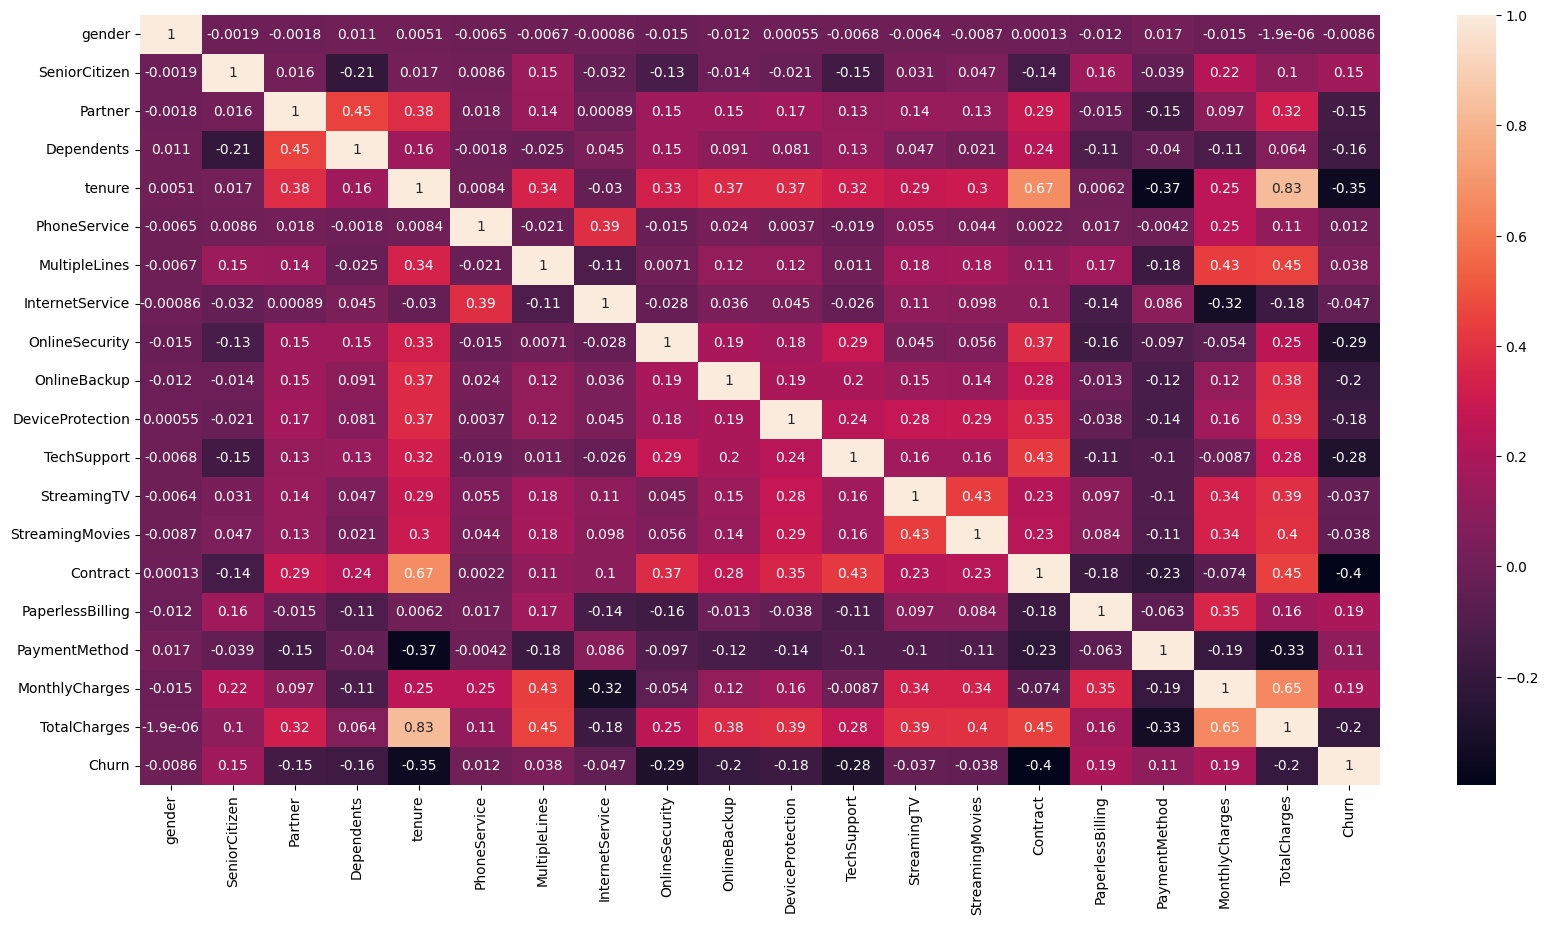

In [133]:
## Visualize correlation

corr=df.corr()
fig,ax=plt.subplots(figsize=(20,10))
sns.heatmap(corr,annot=True)
plt.show()

#### From this above correlation I don't found any correlated features

## Let’s use the generalized linear model (GLM) to gain some statistics of the respective features with the target.

In [134]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [135]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
all_columns=[column.replace(" ","_").replace("(",'_').replace(")","_").replace("-","_") for column in df.columns]
df.columns=all_columns

## Apply GLM
glm_columns=[i for i in all_columns if i not in ['customerID','Churn']]
glm_columns=' + '.join(map(str,glm_columns))

glm_model=smf.glm(formula='Churn ~ '+glm_columns, data=df,family=sm.families.Binomial())
result=glm_model.fit()
print(result.summary())



                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                            GLM   Df Residuals:                     7023
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2928.8
Date:                Mon, 03 Jun 2024   Deviance:                       5857.7
Time:                        20:42:23   Pearson chi2:                 8.17e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2778
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.5154      0.187  

#### For the first question, you should look at the (P>|z|) column. If the absolute p-value is smaller than 0.05, it means that the feature affects Churn in a statistically significant way. Examples are:

#### SeniorCitizen
#### Tenure
#### Contract
#### PaperlessBillings 
#### The second question about feature importances can be answered by looking at the exponential coefficient values. The exponential coefficient estimates the expected change in churn through a given feature by a change of one unit.

In [136]:
np.exp(result.params)

Intercept           0.597274
gender              0.973354
SeniorCitizen       1.267804
Partner             1.014160
Dependents          0.844361
tenure              0.943691
PhoneService        0.356746
MultipleLines       1.073609
InternetService     1.266618
OnlineSecurity      0.762465
OnlineBackup        0.865412
DeviceProtection    0.915341
TechSupport         0.769048
StreamingTV         0.995471
StreamingMovies     1.000637
Contract            0.489343
PaperlessBilling    1.443413
PaymentMethod       1.049272
MonthlyCharges      1.023328
TotalCharges        1.000297
dtype: float64

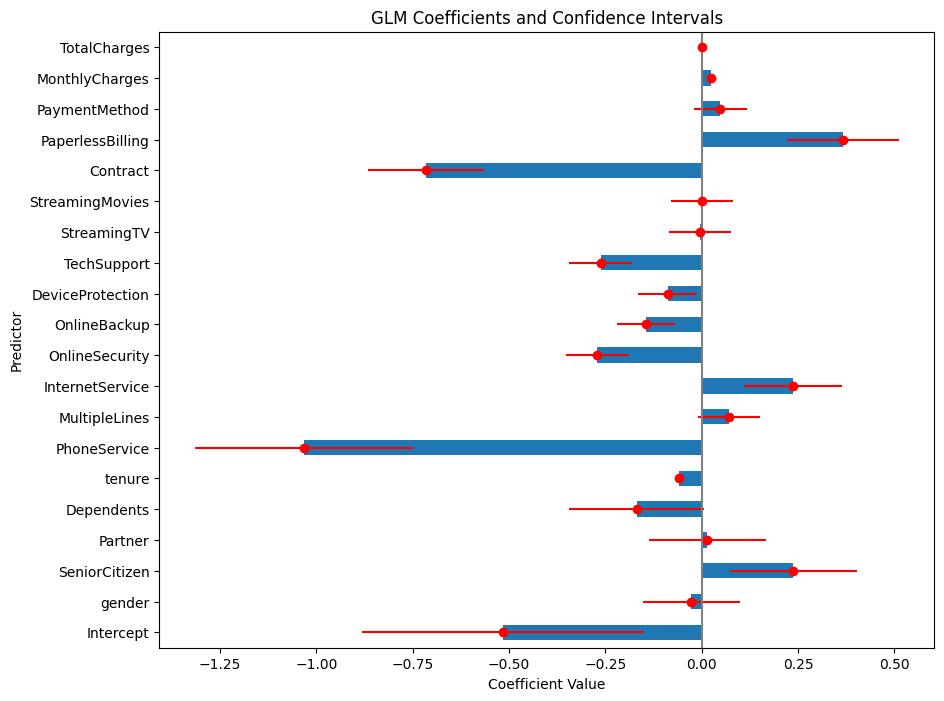

In [137]:
# Extract coefficients and their confidence intervals
coef = result.params
conf = result.conf_int()
conf['coef'] = coef
conf.columns = ['2.5%', '97.5%', 'coef']

# Plot the coefficients
plt.figure(figsize=(10, 8))
conf['coef'].plot(kind='barh')
plt.errorbar(conf['coef'], np.arange(len(conf)), xerr=(conf['97.5%'] - conf['2.5%']) / 2, fmt='o', color='r')
plt.axvline(x=0, color='.5')
plt.title('GLM Coefficients and Confidence Intervals')
plt.xlabel('Coefficient Value')
plt.ylabel('Predictor')
plt.show()

## Normalize the features

In [138]:
from sklearn.preprocessing import MinMaxScaler
def normalize(feature):
    ms=MinMaxScaler()
    df[feature]=ms.fit_transform(df[[feature]])

In [139]:
normalize('tenure')
normalize('MonthlyCharges')
normalize('TotalCharges')

## Train the model

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_recall_curve,precision_score,recall_score

In [141]:
df.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2159,0,0,0,0,0.208333,1,2,2,1,1,1,1,1,1,2,0,0,0.067662,0.040422,0
3001,1,0,0,0,0.125000,1,0,2,1,1,1,1,1,1,0,0,3,0.021393,0.018809,0
5433,1,0,0,0,0.763889,1,0,1,2,2,0,0,2,2,1,1,3,0.822388,0.638501,0
2056,1,0,0,0,0.708333,1,2,1,0,2,0,0,0,0,0,0,0,0.624378,0.469300,0
6195,1,0,0,0,0.055556,1,2,1,0,0,0,0,0,0,0,1,0,0.536816,0.033089,1
1452,1,1,0,0,0.722222,0,1,0,2,0,0,0,2,2,0,1,1,0.303980,0.292667,0
832,0,0,1,1,0.972222,1,0,0,2,2,2,2,0,2,1,0,1,0.555721,0.600450,0
1106,0,0,0,0,0.875000,1,2,1,0,2,0,0,2,2,2,0,0,0.788060,0.719386,0
4837,0,0,1,1,0.013889,1,0,1,0,0,0,0,0,0,0,1,2,0.512935,0.005885,1
2782,1,0,1,1,0.527778,1,2,0,2,0,2,2,2,2,2,1,0,0.668159,0.378283,0


In [142]:
x=df.drop('Churn',axis=1)
y=df['Churn']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [168]:
x['StreamingTV']

0       0
1       0
2       0
3       0
4       0
       ..
7038    2
7039    2
7040    0
7041    0
7042    2
Name: StreamingTV, Length: 7043, dtype: int64

In [152]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

def model_train(model_class, model_name,params={}):
    model = model_class(**params)
    model.fit(x_train, y_train)  # Assuming X_train and y_train are already defined
    y_pred = model.predict(x_test)  # Assuming X_test is already defined
    print_score(model, y_test, y_pred)
    return model

def print_score(alg, y_true, y_pred):
    acc_score = accuracy_score(y_true, y_pred)
    print("Accuracy Score: ", acc_score)
    prec_score = precision_score(y_true, y_pred, average='weighted')
    print("Precision Score: ", prec_score)
    rec_score = recall_score(y_true, y_pred, average='weighted')
    print("Recall Score: ", rec_score)
    f1 = f1_score(y_true, y_pred, average='weighted')
    print("F1 Score: ", f1)

# Running logistic regression model
log_model = model_train(LogisticRegression, 'Logistic Regression')


Accuracy Score:  0.815471965933286
Precision Score:  0.8086176330548334
Recall Score:  0.815471965933286
F1 Score:  0.8106156613700509


In [153]:
# Running logistic regression model
log_model = model_train(LogisticRegression, 'Logistic Regression')


Accuracy Score:  0.815471965933286
Precision Score:  0.8086176330548334
Recall Score:  0.815471965933286
F1 Score:  0.8106156613700509


In [154]:
## Doing feature selection
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

log=LogisticRegression()
rfecv=RFECV(estimator=log,step=1,cv=StratifiedKFold(10,random_state=42,shuffle=True),scoring='accuracy')
rfecv.fit(x, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
      estimator=LogisticRegression(), scoring='accuracy')

In [155]:
a=rfecv.get_params()
a

{'cv': StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(),
 'importance_getter': 'auto',
 'min_features_to_select': 1,
 'n_jobs': None,
 'scoring': 'accuracy',
 'step': 1,
 'verbose': 0}

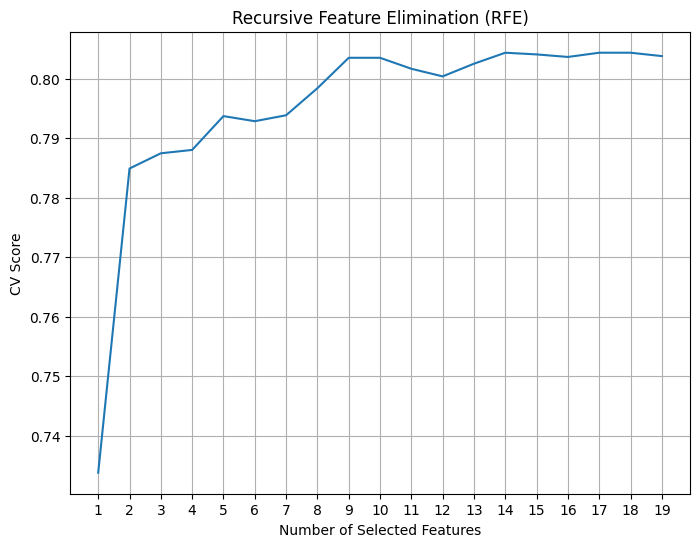

The optimal number of features: 18


In [156]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score'])+1), rfecv.cv_results_['mean_test_score'])
plt.grid()
plt.xticks(range(1, x.shape[1]+1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))

In [157]:
x_rfe=x.iloc[:,rfecv.support_]
x_train,x_test,y_train,y_test=train_test_split(x_rfe,y,test_size=0.2,random_state=42)

In [158]:
svc_model=model_train(SVC, 'SVC')
rf_model=model_train(RandomForestClassifier, 'RandomForest')
dt_model=model_train(DecisionTreeClassifier, 'DecisionTree')
nb_model=model_train(GaussianNB, 'GaussianNB')


Accuracy Score:  0.8019872249822569
Precision Score:  0.7901869590497127
Recall Score:  0.8019872249822569
F1 Score:  0.7899938362452243
Accuracy Score:  0.7934705464868701
Precision Score:  0.7807913376132628
Recall Score:  0.7934705464868701
F1 Score:  0.7821001060562953
Accuracy Score:  0.7260468417317246
Precision Score:  0.7288936771842423
Recall Score:  0.7260468417317246
F1 Score:  0.7274174145680029
Accuracy Score:  0.7579843860894251
Precision Score:  0.8031704187559984
Recall Score:  0.7579843860894251
F1 Score:  0.7696646632032466


In [159]:
lg_model=model_train(LogisticRegression, 'LogisticRegression')

Accuracy Score:  0.815471965933286
Precision Score:  0.8086176330548334
Recall Score:  0.815471965933286
F1 Score:  0.8106156613700509


#### From the above model Logistic Regression performs better.

In [160]:
## Improve best model by hyperparameter tuning
# define model
model = LogisticRegression()

# define evaluation
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
from scipy.stats import loguniform
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 1000)

# define search
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

# execute search
result = search.fit(x_rfe, y)
# summarize result
# print('Best Score: %s' % result.best_score_)
# print('Best Hyperparameters: %s' % result.best_params_)
params = result.best_params_

#Improving the Logistic Regression model
log_model = model_train(LogisticRegression, 'Logistic Regression Classification',)

Accuracy Score:  0.815471965933286
Precision Score:  0.8086176330548334
Recall Score:  0.815471965933286
F1 Score:  0.8106156613700509


## Save the model

In [161]:
import joblib
file='model.sav'
joblib.dump(log_model,file)

['model.sav']

In [162]:
model = joblib.load("model.sav")
model.predict(x_test)

array([1, 0, 0, ..., 0, 0, 1])

In [163]:
model.predict(x_test)

array([1, 0, 0, ..., 0, 0, 1])